# Problem rubnih vrijednosti



## Klasifikacija

Neka je 

$$ 
a\cdot u_{xx}+b\cdot u_{xt}+c\cdot u_{tt}+d\cdot u_x+e\cdot u_t + f\cdot u + g = 0
$$

i neka je

$$
D=b^2-4ac.
$$

Vrijedi sljedeća klasifikacija:

|D | D=0  | D<0 | D>0 |  
|:---:|:---:|:--:|:---:|
|Vrsta| parabolička | eliptička | hiperbolička |
|Problem| difuzija  | ravnoteža | valovi   |
|Domena / Metoda | omeđena / SLP | omeđena / SLP |   |
|Domena / Metoda | neomeđena / integr. trans. | neomeđena / integr. trans. | |

Za neomeđeni interval $(0,\infty)$ koristi se Laplaceova transformacija, a za interval $(-\infty,\infty)$ koristi se Fourierova transformacija.

## Jednadžba difuzije

Zadan je problem 

\begin{align*}
& u_t-u_{xx}=0  \\
& u(x,0)=|x|, \quad -2<x<2 \\
& u_x(-2,t)=0, \quad u_x(2,t)=0, \quad t>0 
\end{align*}

Pretpostavimo separaciju varijabli (rješenje je jedinstveno pa je svaka pretpostavka korektna ako daje rješenje):

$$
u(x,t)=X(x)T(t).
$$ 

Uvrštavanje u jednadžbu daje

$$
XT'=X''T
$$

odnosno (stavljamo $-\lambda$ po dogovoru)

$$
\frac{T'}{T}=\frac{X''}{X}=-\lambda,
$$

za neki $\lambda \in\mathbb{R}$.
Dakle,

$$
\frac{T'}{T}=\frac{X''}{X}=-\lambda,
$$

za neki $\lambda \in\mathbb{R}$.

Dobili smo SLP i populacijsku jednadžbu:

1. SLP: $ X''+\lambda X=0$ uz uvjete $X'(-2)=0$ i $X'(2)=0$
2. Populacijska jednadžba: $T'+\lambda T=0$

Za $\lambda \geq 0$ SLP ima svojstvene vrijednosti (izračunajte!, vidi napomenu!)

$$
\lambda_n = \frac{n^2\pi^2}{4}, \quad n\in \mathbb{N}\cup \{0\}.
$$

i pripadne svojstvene funkcije 

$$ 
X_n(x)= A_n \cos \big(\frac{n\pi}{2}x\big ).
$$

Za svaki $\lambda_n$ rješenje populacijske jednadžbe glasi 

$$
T_n(t)=B_n e^{\displaystyle-\frac{n^2\pi^2}{4} t}
$$

što zajedno daje 

$$
u_n(x,t)= C_n \cos \big(\frac{n\pi}{2}x\big ) e^{\displaystyle-\frac{n^2\pi^2}{4} t}.
$$

Svaka funkcija $u_n$ zadovoljava jednadžbu i rubne uvjete. 

Prema _principu superpozicije_ i funkcija 

$$
u(x,t)=\sum_{n=0}^\infty u_n(x,t)= \sum_{n=0}^\infty C_n \cos \big(\frac{n\pi}{2}x\big ) e^{\displaystyle-\frac{n^2\pi^2}{4} t}
$$

također zadovoljava jednadžbu i rubne uvjete. Treba još odabrati koeficijente $C_n$ tako da se zadovolji i početni uvijet - radi se o razvoju u _(generalizirani) Fourierov red_:

\begin{align*}
& u(x,0)=\sum_{n=0}^\infty C_n \cos \big(\frac{n\pi}{2}x\big ) \\
& C_n=  \displaystyle \frac{ \big(|x|, \cos \big(\frac{n\pi}{2}x\big ) \big)}
{\big (\cos \big(\frac{n\pi}{2}x\big ), \cos \big(\frac{n\pi}{2}x\big ) \big)} \tag{*}
\end{align*}

__Napomena:__ Kod traženja svojstvenih vrijednosti za slučaj $\lambda>0$, zbog parnosti početnog uvjeta možemo odmah staviti da je koeficijent uz $\sin(\sqrt{\lambda}x)$ jednak nuli.

Probajmo simboličko računanje - treba nam paket `SymPy.jl`:

In [1]:
using SymPy

In [2]:
# Definirajmo simbole
n=symbols("n",integer=True,nonnegative=True)
x=symbols("x",real=True)

x

In [3]:
using LinearAlgebra

In [4]:
# Definirajmo skalarni produkt
import LinearAlgebra.⋅
⋅(f,g,a,b)=integrate(f(x)*g(x),(x,a,b))

dot (generic function with 13 methods)

In [5]:
# Umjesto g=abs(x)
g(x)=x*Heaviside(x)-x*Heaviside(-x)

g (generic function with 1 method)

In [6]:
f(n,x)=cos(n*PI*x/2)

f (generic function with 1 method)

In [7]:
# Na primjer
f(2,x)

cos(π⋅x)

In [8]:
f(0,x)

1

Izračunajmo koeficijente $C_n$:

In [9]:
C(n)=⋅(g(x),f(n,x),-2,2)/⋅(f(n,x),f(n,x),-2,2)

C (generic function with 1 method)

In [10]:
C(0)

1

In [11]:
C(1)

-8 
───
  2
 π 

In [12]:
C(2)

0

In [13]:
C(3)

-8  
────
   2
9⋅π 

In [14]:
C(5)

 -8  
─────
    2
25⋅π 

Vidimo da je 

\begin{align}
& C_0=1, \\
& C_{2k}=0, \\
& C_{2k-1}=\displaystyle\frac{-8}{(2k-1)^2\pi^2},
\end{align}

odnosno

$$
u(x,t)=1 - \sum_{k=1}^\infty \frac{8}{(2k-1)^2\pi^2}
\cos \bigg(\frac{(2k-1)\pi}{2}x\bigg ) e^{\displaystyle-\frac{(2k-1)^2\pi^2}{4} t}.
$$

Definirajmo sumu prvih $n$ članova reda:

In [15]:
k=symbols("k", integer=True, nonnegative=True)
t=symbols("t", real=True, nonnegative=True)

t

In [16]:
u(n,x,t)=C(n)*f(n,x)*exp(-(n^2*PI^2/4)*t)

u (generic function with 1 method)

In [17]:
# Na primjer
u(0,x,t)

1

In [18]:
u(3,x,t)

        2               
    -9⋅π ⋅t             
    ────────            
       4        ⎛3⋅π⋅x⎞ 
-8⋅ℯ        ⋅cos⎜─────⎟ 
                ⎝  2  ⎠ 
────────────────────────
             2          
          9⋅π           

In [19]:
# u(3,x,t) u zadanoj točki
u(3,0.5,0.5)

            2             
    -1.125⋅π              
-8⋅ℯ         ⋅cos(0.75⋅π) 
──────────────────────────
              2           
           9⋅π            

In [20]:
# Numerička vrijednost
N(u(3,0.5,0.5))

9.592430540562468751472090382161178189698489151335243936752010738066994113725231e-07

In [21]:
# Suma prvih n članova reda
U(n,x,t)=sum([u(k,x,t) for k=0:n])

U (generic function with 1 method)

In [22]:
# Na primjer
U(5,0.5,0.5)

                2                 2              2                
        -0.125⋅π          -3.125⋅π       -1.125⋅π                 
  4⋅√2⋅ℯ            4⋅√2⋅ℯ            8⋅ℯ         ⋅cos(0.75⋅π)    
- ─────────────── + ─────────────── - ──────────────────────── + 1
          2                  2                     2              
         π               25⋅π                   9⋅π               

In [23]:
# Numerička vrijednost
N(U(5,0.5,0.5))

0.8330895966582437477415034267542879745236008661595193870885264512109283990120554

In [24]:
# Za t=0 ovo mora konvergirati u |x|
@time N(U(11,0.5,0.0))

 27.864261 seconds (10.58 k allocations: 386.149 KiB)


0.4994152381404319713930517572608357654281954907461756811703554062543148448070287

__Napomena:__ Radi se o simboličkom računanju pa ne treba pretjerivati s $n$.

### Crtanje

In [25]:
m=16
X=range(-2,2, length=m)
T=range(0,5,length=m)

0.0:0.3333333333333333:5.0

In [26]:
collect(T)

16-element Array{Float64,1}:
 0.0               
 0.3333333333333333
 0.6666666666666666
 1.0               
 1.3333333333333333
 1.6666666666666667
 2.0               
 2.3333333333333335
 2.6666666666666665
 3.0               
 3.3333333333333335
 3.6666666666666665
 4.0               
 4.333333333333333 
 4.666666666666667 
 5.0               

In [27]:
# Radi brzine pripremimo U(9)
U9=U(9,x,t)

         2                      2                         2                   
       -π ⋅t                -9⋅π ⋅t                  -25⋅π ⋅t                 
       ──────               ────────                 ─────────                
         4       ⎛π⋅x⎞         4        ⎛3⋅π⋅x⎞          4        ⎛5⋅π⋅x⎞     
    8⋅ℯ      ⋅cos⎜───⎟   8⋅ℯ        ⋅cos⎜─────⎟   8⋅ℯ         ⋅cos⎜─────⎟   8⋅
                 ⎝ 2 ⎠                  ⎝  2  ⎠                   ⎝  2  ⎠     
1 - ────────────────── - ────────────────────── - ─────────────────────── - ──
             2                       2                         2              
            π                     9⋅π                      25⋅π               

      2                         2              
 -49⋅π ⋅t                  -81⋅π ⋅t            
 ─────────                 ─────────           
     4        ⎛7⋅π⋅x⎞          4        ⎛9⋅π⋅x⎞
ℯ         ⋅cos⎜─────⎟   8⋅ℯ         ⋅cos⎜─────⎟
              ⎝  2  ⎠                   ⎝  2  ⎠


In [29]:
# Sada je puno brže jer se samo uvrštava, treba zamijeniti x i t
@time N(U9(0.0,-2.0))

  0.028026 seconds (100.01 k allocations: 5.049 MiB)


1.959604786800243944468920265157651480127477623741930347903842569318346976775028

In [30]:
# Ovo je sada brzo
# (16*16*0.05=12 sekunda)
z = zeros(m,m)
for i in 1:m
    for j in 1:m
        # Treba zamijeniti x i t
        z[i,j] = Float64(U9(T[i],X[j]))
    end
end

In [31]:
z

16×16 Array{Float64,2}:
 1.9596   1.72784  1.47151  1.19975  …  1.19975  1.47151  1.72784  1.9596 
 1.35618  1.32535  1.23825  1.11        1.11     1.23825  1.32535  1.35618
 1.15646  1.14293  1.10469  1.04835     1.04835  1.10469  1.14293  1.15646
 1.06874  1.0628   1.046    1.02124     1.02124  1.046    1.0628   1.06874
 1.0302   1.02759  1.02021  1.00933     1.00933  1.02021  1.02759  1.0302 
 1.01327  1.01212  1.00888  1.0041   …  1.0041   1.00888  1.01212  1.01327
 1.00583  1.00533  1.0039   1.0018      1.0018   1.0039   1.00533  1.00583
 1.00256  1.00234  1.00171  1.00079     1.00079  1.00171  1.00234  1.00256
 1.00113  1.00103  1.00075  1.00035     1.00035  1.00075  1.00103  1.00113
 1.00049  1.00045  1.00033  1.00015     1.00015  1.00033  1.00045  1.00049
 1.00022  1.0002   1.00015  1.00007  …  1.00007  1.00015  1.0002   1.00022
 1.0001   1.00009  1.00006  1.00003     1.00003  1.00006  1.00009  1.0001 
 1.00004  1.00004  1.00003  1.00001     1.00001  1.00003  1.00004  1.00004
 

Treba nam paket `PyPlot.jl` za 3D crtanje.

In [32]:
using PyPlot

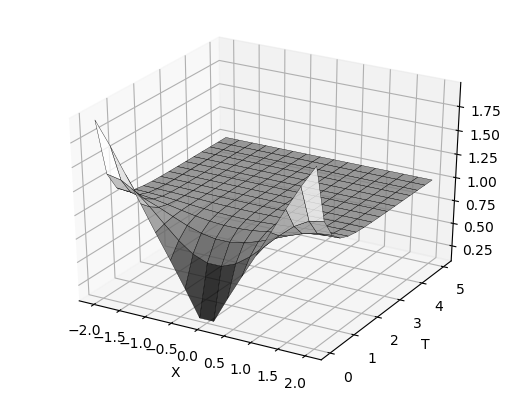

PyObject <matplotlib.text.Text object at 0x7f3772c0f3c8>

In [33]:
plot_surface(X,T,z,rstride=1,edgecolors="k", cstride=1, 
    cmap=ColorMap("gray"), alpha=0.8, linewidth=0.25)
xlabel("X")
ylabel("T")

### Numeričko računanje i crtanje

In [34]:
X=range(-2,2,length=50)
T=range(0,5,length=50)
XT=collect(Iterators.product(X,T))

50×50 Array{Tuple{Float64,Float64},2}:
 (-2.0, 0.0)      (-2.0, 0.102041)      …  (-2.0, 5.0)    
 (-1.91837, 0.0)  (-1.91837, 0.102041)     (-1.91837, 5.0)
 (-1.83673, 0.0)  (-1.83673, 0.102041)     (-1.83673, 5.0)
 (-1.7551, 0.0)   (-1.7551, 0.102041)      (-1.7551, 5.0) 
 (-1.67347, 0.0)  (-1.67347, 0.102041)     (-1.67347, 5.0)
 (-1.59184, 0.0)  (-1.59184, 0.102041)  …  (-1.59184, 5.0)
 (-1.5102, 0.0)   (-1.5102, 0.102041)      (-1.5102, 5.0) 
 (-1.42857, 0.0)  (-1.42857, 0.102041)     (-1.42857, 5.0)
 (-1.34694, 0.0)  (-1.34694, 0.102041)     (-1.34694, 5.0)
 (-1.26531, 0.0)  (-1.26531, 0.102041)     (-1.26531, 5.0)
 (-1.18367, 0.0)  (-1.18367, 0.102041)  …  (-1.18367, 5.0)
 (-1.10204, 0.0)  (-1.10204, 0.102041)     (-1.10204, 5.0)
 (-1.02041, 0.0)  (-1.02041, 0.102041)     (-1.02041, 5.0)
 ⋮                                      ⋱                 
 (1.10204, 0.0)   (1.10204, 0.102041)      (1.10204, 5.0) 
 (1.18367, 0.0)   (1.18367, 0.102041)      (1.18367, 5.0) 
 (1.26531, 0.0)  

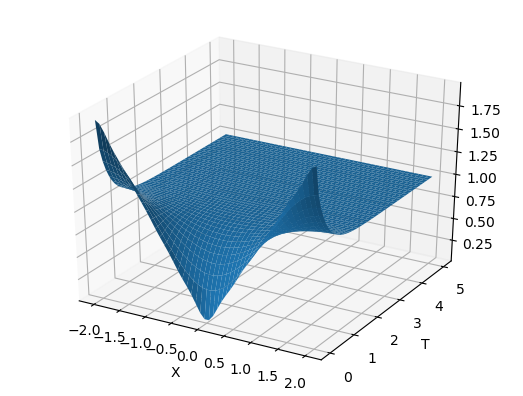

PyObject <matplotlib.text.Text object at 0x7f3772a3c978>

In [35]:
# Probajmo l od 1 do 10
l=5
h(xt)=1-8*sum([cos.((2*k-1)*pi*xt[1]/2).*exp.(-(2*k-1)^2*pi^2*xt[2]/4)/((2*k-1)^2*π^2) 
        for k=1:l])
surf(X,T,map(h,XT)')
xlabel("X")
ylabel("T")

## Primjer 1

\begin{align*}
& u_t-u_{xx}=-u \\
& u(x,0)=f(x)=\begin{cases}0, \quad -1<x<0 \\ x,\quad 0<x<1 \end{cases} \\
& u(-1,t)=0,\quad u(1,t)=0 
\end{align*}

Za detalje o simboličkom računanju pogledajte
[SymPy Tutorial](https://github.com/jverzani/SymPy.jl/blob/master/examples/tutorial.md).

Uvrštavanjem

$$
u(x,t)=X(x)T(t)
$$

jednadžba prelazi u jednadžbu

$$
T'X-TX''=-TX,
$$

što daje dvije jednadžbe:

$$
\frac{X''}{X}=\frac{T'+T}{T}=-\lambda.
$$

Jednadžba po $T$ je populacijska jednadžba koja glasi

$$
T'=-(\lambda+1)T
$$

i čije rješenje je

$$
T=Ce^{-(\lambda+1)t}.
$$

Riješimo SLP po $X$:

$$
X''=-\lambda X, \quad X(-1)=0, \quad X(1)=0.
$$

In [36]:
F = SymFunction("F")

F

In [37]:
l=symbols("l",real=true,positive=true)
diffeq = Eq(diff(F(x), x, x) +l*F(x), 0)

           2          
          d           
l⋅F(x) + ───(F(x)) = 0
           2          
         dx           

In [38]:
ex = dsolve(diffeq)

F(x) = C₁⋅sin(√l⋅x) + C₂⋅cos(√l⋅x)

In [39]:
ex1 = rhs(ex)

C₁⋅sin(√l⋅x) + C₂⋅cos(√l⋅x)

Uvrstimo rubne uvjete:

In [40]:
ex1a=subs(ex1,x,-1)

-C₁⋅sin(√l) + C₂⋅cos(√l)

In [41]:
ex1b=subs(ex1,x,1)

C₁⋅sin(√l) + C₂⋅cos(√l)

In [42]:
solve(cos(sqrt(l)),l)

2-element Array{Sym,1}:
   pi^2/4
 9*pi^2/4

Sustav jednadžbi je homogen i glasi

$$
\begin{bmatrix} -C_1 & C_2 \\ C_1 & C_2 \end{bmatrix} \begin{bmatrix}\sin \sqrt{\lambda} \\ \cos\sqrt{\lambda} \end{bmatrix} = \begin{bmatrix} 0\\ 0\end{bmatrix}.
$$

Trivijalno rješenje je u ovom slučaju očito nemoguće, a netrivijalna rješenje postoje kada je 
matrica sustava singularna, odnosno kada je $C_1=0$ ili $C_2=0$.

Kada je $C_1=0$ onda je $\cos\sqrt{\lambda}=0$ pa je 

$$
\sqrt{\lambda}=\frac{2n+1}{2}\pi, \quad n=0,1,2,3,\ldots
$$

Kada je $C_2=0$ onda je $\sin\sqrt{\lambda}=0$ pa je 

$$
\sqrt{\lambda}=n\pi, \quad n=0,1,2,3,\ldots
$$

Dakle, rješenje problema koje zadovoljava jednadžbu i rubne uvjete ima oblik:

\begin{equation*}
u(x,t)=\sum_{n=0}^\infty a_n \cos \bigg(\frac{2n+1}{2}\pi x\bigg)
e^{-\big(\big[\frac{2n+1}{2}\pi\big]^2+1\big)t}+b_n \sin (n\pi x)\,e^{-([n\pi]^2+1)t}.
\end{equation*}

Potrebno je zadovoljiti još početni uvjet:

\begin{equation*}
u(x,0)=\sum_{n=0}^\infty a_n \cos \bigg(\frac{2n+1}{2}\pi x\bigg)+b_n \sin (n\pi x)=f(x).
\end{equation*}
 
Radi se o razvoju u generalizirani Fourierov red funkcije f(x): 

In [43]:
# p=piecewise((0,Lt(x,0)),(x,Ge(x,0)))
p=x*Heaviside(x)

x⋅Heaviside(x)

Provjerimo ortonormiranost sustava funkcija.

In [44]:
⋅(cos((2*n+1)*pi*x/2),cos((2*n+1)*pi*x/2),-1,1)

1

In [45]:
⋅(sin(n*pi*x),sin(n*pi*x),-1,1)

⎧0  for π⋅n = 0
⎨              
⎩1   otherwise 

Norme svih funkcija su jednake $1$ pa ne trebamo računati nazivnike.

In [46]:
a(n)=⋅(p(x),cos((2*n+1)*PI*x/2),-1,1)

a (generic function with 1 method)

In [47]:
a(0)

  4    2
- ── + ─
   2   π
  π     

In [48]:
N(a(0))

0.2313350377982302573000172006511468925204034842728395996082332486588947066879649

In [49]:
b(n)=⋅(p(x),sin(n*PI*x),-1,1)

b (generic function with 1 method)

In [50]:
b(0)

0

In [51]:
b(1)

1
─
π

Pripremimo se za brže računanje tako da ćemo unaprijed izračunati numeričke
vrijednosti koeficijenata $a_n$ i $b_n$. 

In [52]:
A=[Float64(a(n)) for n=0:20]

21-element Array{Float64,1}:
  0.23133503779823025 
 -0.2572382279635661  
  0.11111256509074223 
 -0.0992167987988249  
  0.06573201502146767 
 -0.06122398537696484 
  0.04657261719650418 
 -0.04424258364481365 
  0.03604585258020599 
 -0.03462897620374902 
  0.029396214252040493
 -0.02844525425146261 
  0.024816335319392292
 -0.024134456225643412
  0.02147049781699228 
 -0.020957853983313603
  0.018919345962865777
 -0.01851998103464057 
  0.01690989542953335 
 -0.016590043298425394
  0.015286214118085357

In [53]:
B=[Float64(b(n)) for n=0:20]

21-element Array{Float64,1}:
  0.0                 
  0.3183098861837907  
 -0.15915494309189535 
  0.1061032953945969  
 -0.07957747154594767 
  0.06366197723675814 
 -0.05305164769729845 
  0.04547284088339867 
 -0.039788735772973836
  0.035367765131532294
 -0.03183098861837907 
  0.028937262380344605
 -0.026525823848649224
  0.02448537586029159 
 -0.022736420441699334
  0.021220659078919377
 -0.019894367886486918
  0.018724110951987685
 -0.017683882565766147
  0.016753151904410034
 -0.015915494309189534

In [54]:
X=range(-1,1,length=50)
T=range(0,5,length=50)
XT=collect(Iterators.product(X,T));

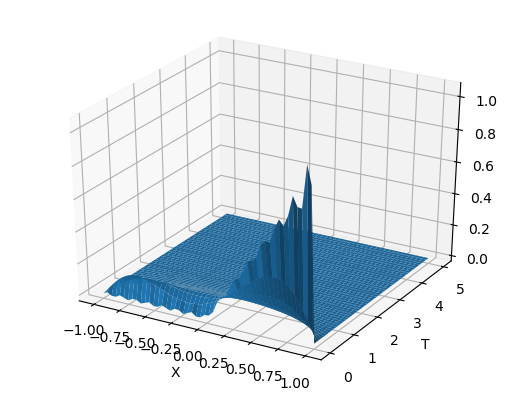

PyObject <matplotlib.text.Text object at 0x7f37723e2128>

In [55]:
l=15
h(xt)=sum([A[k]*cos.((2*k-1)*pi*xt[1]/2).*exp.(-(((2*k-1)*pi/2)^2/4+1)*xt[2])+
        B[k]*sin.((k-1)*pi*xt[1]).*exp.(-(((k-1)*pi)^2+1)*xt[2]) for k=1:l]) 
surf(X,T,map(h,XT)')
xlabel("X")
ylabel("T")

## Homogenizacija

U oba prethodna primjera zadani su homogeni rubni uvjeti. Ukoliko rubni uvjeti nisu homogeni, zadani problem je potrebno _homogenizirati_ kako bi mogli dobiti regularni SLP.

Navedimo primjer. Neka je zadan problem

\begin{align*}
& u_t -u_{xx}=0,\quad 0<x<l,\quad t>0 \\
& u(x,0)=f(x),\quad 0<x<l \\
& u(0,t)=g(t),\quad u(l,t)=h(t),\quad t>0.
\end{align*}
 
Nađimo rješenje u obliku

$$
u(x,t)=v(x,t)+U(x,t),
$$

gdje je $v$ rješenje problema sa homogenim rubnim uvjetima. Vrijedi

\begin{align*}
& u=v+U\\
& u_t=v_t+U_t\\
& u_{xx}=v_{xx}+U_{xx}
\end{align*}

pa zadana PDJ prelazi u 

$$
v_t+U_t=v_{xx}+U_{xx}.
$$

Početni uvjet za $v$ glasi

$$
v(x,0)=u(x,0)-U(x,0)=f(x)-U(x,0),
$$

a rubni uvjeti glase

\begin{align*}
& v(0,t)=u(0,t)-U(0,t)=g(t)-U(0,t)=0\quad  \textrm{(želimo homogeni uvjet)}\\
& v(l,t)=u(l,t)-U(l,t)=h(t)-U(l,t)=0 \quad  \textrm{(želimo homogeni uvjet)}
\end{align*}

Zaključujemo da će $v$ zadovoljavati homogene rubne uvjete ako je 

$$
U(x,t)=g(t)+\displaystyle\frac{x}{l}[h(t)-g(t)],\quad 0<x<l.
$$

Za ovako definiranu funkciju $U$ vrijedi

\begin{align*}
& U_t=g'(t)+\displaystyle\frac{x}{l}[h'(t)-g'(t)]\\
& U_{xx}=0.
\end{align*}

Uvrštavanjem slijedi da je $v$ rješenje _homogenog_ reakcijsko-difuzijskog problema

\begin{align*}
&v_t=v_{xx}-g'(t)-\displaystyle\frac{x}{l}[h'(t)-g'(t)], \quad 0<x<l,\quad t>0
\\
&v(x,0)=f(x)-g(0)-\displaystyle\frac{x}{l}[h(0)-g(0)], \quad 0<x<l
\\
& v(0,t)=0,\quad v(l,t)=0,\quad t>0,
\end{align*}

dok je rješenje polaznog problema

$$
u(x,t)=v(x,t)+g(t)+\displaystyle\frac{x}{l}[h(t)-g(t)].
$$